### 1.このSprintについて  
#### Sprintの目的  
機械学習分野の論文から有益な情報を引き出せるようにする  
これまで扱ってきた領域の論文から新たな知識を得る  
#### どのように学ぶか  
ある論文に対しての問題に答えていくことで、読むポイントを学んでいきます。  

### 2.論文読解
以下の論文を読み問題に答えてください。CNNを使った物体検出（Object Detection）の代表的な研究です。  
[8]Ren, S., He, K., Girshick, R., Sun, J.: Faster r-cnn: Towards real-time object detection with region proposal networks. In: Advances in neural information processing systems. (2015) 91–99  
https://arxiv.org/pdf/1506.01497.pdf  

# 問題
それぞれについてJupyter Notebookにマークダウン形式で記述してください。

## (1) 物体検出の分野にはどういった手法が存在したか。

物体検出の分野では「Faster R-CNN」の発表前、「SPPnet」「Fast R-CNN」などの手法が用いられていた。  
  
Advances like SPPnet [1] and Fast R-CNN [2] have reduced the running time of these detection networks, exposing region proposal computation as a bottleneck.

#### 「Fast R-CNN」とは？ （論文：https://arxiv.org/pdf/1504.08083.pdf ）
画像に対して、最初に1回だけ CNN で特徴抽出を行なって、その特徴マップから候補領域を切り出して物体認識を行なう方法  
  
2． Fast R-CNN architecture and training  
Fig. 1 illustrates the Fast R-CNN architecture. A Fast R-CNN network takes as input an entire image and a set of object proposals. 
The network first processes the whole image with several convolutional (conv) and max pooling layers to produce a conv feature map. Then, for each object proposal a region of interest (RoI) pooling layer extracts a fixed-length feature vector from the feature map.
Each feature vector is fed into a sequence of fully connected (fc) layers that finally branch into two sibling output layers: one that produces softmax probability estimates over K object classes plus a catch-all “background” class and another layer that outputs four real-valued numbers for each of the K object classes. Each set of 4 values encodes refined bounding-box positions for one of the K classes.

#### 「SPPnet」とは？　（論文：https://arxiv.org/pdf/1406.4729.pdf ）  
「SPPnet」は、Spatial Pyramid Pooling とよばれる手法を用いて、CNN で抽出された特徴量を可変サイズで取り扱えるようにした方法
  
Abstract—Existing deep convolutional neural networks (CNNs) require a fixed-size (e.g., 224×224) input image. This requirement is “artificial” and may reduce the recognition accuracy for the images or sub-images of an arbitrary size/scale. In this
work, we equip the networks with another pooling strategy, “spatial pyramid pooling”, to eliminate the above requirement. The
new network structure, called SPP-net, can generate a fixed-length representation regardless of image size/scale. Pyramid
pooling is also robust to object deformations. With these advantages, SPP-net should in general improve all CNN-based image
classification methods.

#### 「R-CNN」とは？  （論文：https://arxiv.org/pdf/1311.2524.pdf ）
画像の中からオブジェクトらしき領域を検出し、それぞれの候補領域に対して CNN で特徴を抽出し、その特徴を SVM に入力して物体認識を行なう方法  
  
Abstract  
Object detection performance, as measured on the canonical PASCAL VOC dataset, has plateaued in the last few years. The best-performing methods are complex ensemble systems that typically combine multiple low-level image features with high-level context. In this paper, we propose a simple and scalable detection algorithm that improves mean average precision (mAP) by more than 30% relative to the previous best result on VOC 2012—achieving a mAP of 53.3%. Our approach combines two key insights:
(1) one can apply high-capacity convolutional neural networks (CNNs) to bottom-up region proposals in order to localize and segment objects and (2) when labeled training data is scarce, supervised pre-training for an auxiliary task, followed by domain-specific fine-tuning, yields a significant performance boost. Since we combine region proposals with CNNs, we call our method R-CNN: Regions with CNN features. We also compare R-CNN to OverFeat, a recently proposed sliding-window detector based on a similar CNN architecture

## (2) Fasterとあるが、どういった仕組みで高速化したのか。

「R-CNN」や「Fast R-CNN」の物体候補を検出アルゴリズムを改良し、物体の候補位置と物体認識の両方を深層学習（CNN）で行えるようにした。


「R-CNN」や「Fast R-CNN」では、「selective search」と呼ばれているアルゴリズムでオブジェクトの位置を決め、畳み込みニューラルネットワーク（CNN）でオブジェクトのクラスを判定している。一方で「Faster R-CNN」では、オブジェクトの位置とオブジェクトのクラス判定の両方を CNN で行っている。この「Faster R-CNN」では、処理時間のかかる「selective search」を使わないことで、アルゴリズム全体の処理時間を大幅に短縮させることを可能にした。  
  
Abstract—State-of-the-art object detection networks depend on region proposal algorithms to hypothesize object locations. Advances like SPPnet [1] and Fast R-CNN [2] have reduced the running time of these detection networks, exposing region proposal computation as a bottleneck. In this work, we introduce a Region Proposal Network (RPN) that shares full-image convolutional features with the detection network, thus enabling nearly cost-free region proposals. An RPN is a fully convolutional network that simultaneously predicts object bounds and objectness scores at each position. The RPN is trained end-to-end to generate high-quality region proposals, which are used by Fast R-CNN for detection. We further merge RPN and Fast R-CNN into a single network by sharing their convolutional features—using the recently popular terminology of neural networks with “attention” mechanisms, the RPN component tells the unified network where to look. For the very deep VGG-16 model [3], our detection system has a frame rate of 5fps (including all steps) on a GPU, while achieving state-of-the-art object detection accuracy on PASCAL VOC 2007, 2012, and MS COCO datasets with only 300 proposals per image. In ILSVRC and COCO 2015 competitions, Faster R-CNN and RPN are the foundations of the 1st-place winning entries in several tracks. Code has been made publicly available.  
  
3 FASTER R-CNN Our object detection system, called Faster R-CNN, is composed of two modules. The first module is a deep fully convolutional network that proposes regions, and the second module is the Fast R-CNN detector [2] that uses the proposed regions. The entire system is a single, unified network for object detection (Figure 2). Using the recently popular terminology of neural networks with ‘attention’ [31] mechanisms, the RPN module tells the Fast R-CNN module where to look. In Section 3.1 we introduce the designs and properties of the network for region proposal. In Section 3.2 we develop algorithms for training both modules with features shared.

## (3) One-Stageの手法とTwo-Stageの手法はどう違うのか。

「Faster R-CNN」は「領域提案」ステージと「検出」ステージが独立した「Two-Stage」手法であるのに対し、「OverFeat」は「検出」ステージのみの「One-Stage」手法となっている。  
  
→　「One-Stage」手法と「Two-Stage」手法の違いは「領域提案」ステージが分離されているかされていないかの違いである。  
  
One-Stage Detection vs. Two-Stage Proposal + Detection. The OverFeat paper [9] proposes a detection method that uses regressors and classifiers on sliding windows over convolutional feature maps. OverFeat is a one-stage, class-specific detection pipeline, and ours is a two-stage cascade consisting of class-agnostic proposals and class-specific detections. In OverFeat, the region-wise features come from a sliding window of one aspect ratio over a scale pyramid. These features are used to simultaneously determine the location and category of objects. In RPN, the features are from square (3×3) sliding windows and predict proposals relative to anchors with different scales and aspect ratios. Though both methods use sliding windows, the region proposal task is only the first stage of Faster RCNN—the downstream Fast R-CNN detector attends to the proposals to refine them. In the second stage of our cascade, the region-wise features are adaptively pooled [1], [2] from proposal boxes that more faithfully cover the features of the regions. We believe these features lead to more accurate detections. To compare the one-stage and two-stage systems, we emulate the OverFeat system (and thus also circumvent other differences of implementation details) by one-stage Fast R-CNN. In this system, the “proposals” are dense sliding windows of 3 scales (128, 256, 512) and 3 aspect ratios (1:1, 1:2, 2:1). Fast R-CNN is trained to predict class-specific scores and regress box locations from these sliding windows. Because the OverFeat system adopts an image pyramid, we also evaluate using convolutional features extracted from 5 scales. We use those 5 scales as in [1], [2]. Table 10 compares the two-stage system and two variants of the one-stage system. Using the ZF model, the one-stage system has an mAP of 53.9%. This is lower than the two-stage system (58.7%) by 4.8%. This experiment justifies the effectiveness of cascaded region proposals and object detection. Similar observations are reported in [2], [39], where replacing SS region proposals with sliding windows leads to ∼6% degradation in both papers. We also note that the onestage system is slower as it has considerably more proposals to process.  

## (4) RPNとは何か。

RPNは「feature map」を入力にして物体の領域の候補を出力する。  
  
 An RPN is a fully convolutional network that simultaneously predicts object bounds and objectness scores at each position. The RPN is trained end-to-end to generate high-quality region proposals, which are used by Fast R-CNN for detection. We further merge RPN and Fast R-CNN into a single network by sharing their convolutional features—using the recently popular terminology of neural networks with “attention” mechanisms, the RPN

## (5) RoIプーリングとは何か。

「RoIプーリング」は分類を行う層への入力を固定次元にする役割がある。  
物体検出の領域は可変長のため、その得られた領域を次の分類のネットワークで処理するため、固定次元に縮小する処理を行うのが「RoIプーリング」である。  
  
where x, y, w, and h denote the box’s center coordinates and its width and height. Variables x, xa, and x ∗ are for the predicted box, anchor box, and groundtruth box respectively (likewise for y, w, h). This can be thought of as bounding-box regression from an anchor box to a nearby ground-truth box. Nevertheless, our method achieves bounding-box regression by a different manner from previous RoIbased (Region of Interest) methods [1], [2]. In [1], [2], bounding-box regression is performed on features pooled from arbitrarily sized RoIs, and the regression weights are shared by all region sizes. In our formulation, the features used for regression are of the same spatial size (3 × 3) on the feature maps. To account for varying sizes, a set of k bounding-box regressors are learned. Each regressor is responsible for one scale and one aspect ratio, and the k regressors do not share weights. As such, it is still possible to predict boxes of various sizes even though the features are of a fixed size/scale, thanks to the design of anchors.


## (6) Anchorのサイズはどうするのが適切か。

「feature maps」上の各点をAnchorとし、それぞれのAnchorに対して「3つのスケール」と「3つのアスペクト比」を使用し、各スライド位置で9個のアンカーを生成する。
  
anchors. An anchor is centered at the sliding window in question, and is associated with a scale and aspect ratio (Figure 3, left). By default we use 3 scales and 3 aspect ratios, yielding k = 9 anchors at each sliding position. For a convolutional feature map of a size W × H (typically ∼2,400), there are W Hk anchors in total.  
  
上記の「3つのスケール」と「3つのアスペクト比」を使用した場合、以下の検証結果のように「mAP」の値が「69.9」と最も高くなっている。  
  
table 8: Detection results of Faster R-CNN on PASCAL VOC 2007 test set using different settings of anchors. The network is VGG-16. The training data is VOC 2007 trainval. The default setting of using 3 scales and 3 aspect ratios (69.9%) is the same as that in Table 3.

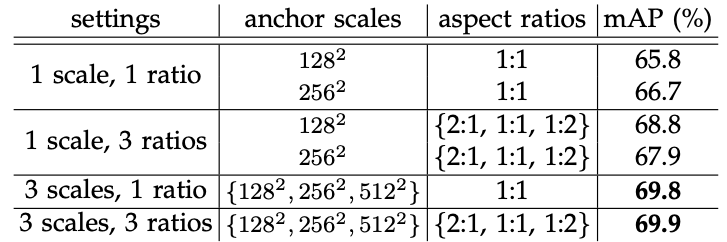

## (7) 何というデータセットを使い、先行研究に比べどういった指標値が得られているか。

オブジェクト検出のための「Microsoft COCO」データセットを用いて、「COCO mAP(mean Average Precision)」の指標値で「Fast R-CNN」と比較を行っている。  
  
4.2 Experiments on MS COCO We present more results on the Microsoft COCO object detection dataset [12]. This dataset involves 80 object categories. We experiment with the 80k images on the training set, 40k images on the validation set, and 20k images on the test-dev set. We evaluate the mAP averaged for IoU ∈ [0.5 : 0.05 : 0.95] (COCO’s standard metric, simply denoted as mAP @ [.5, .95]) and mAP @ 0.5 (PASCAL VOC’s metric). There are a few minor changes of our system made for this dataset. We train our models on an 8-GPU implementation, and the effective mini-batch size becomes 8 for RPN (1 per GPU) and 16 for Fast R-CNN (2 per GPU). The RPN step and Fast R-CNN step are both trained for 240k iterations with a learning rate of 0.003 and then for 80k iterations with 0.0003. We modify the learning rates (starting with 0.003 instead of 0.001) because the mini-batch size is changed. For the anchors, we use 3 aspect ratios and 4 scales (adding 642 ), mainly motivated by handling small objects on this dataset. In addition, in our Fast R-CNN step, the negative samples are defined as those with a maximum IoU with ground truth in the interval of [0, 0.5), instead of [0.1, 0.5) used in [1], [2]. We note that in the SPPnet system [1], the negative samples in [0.1, 0.5) are used for network fine-tuning, but the negative samples in [0, 0.5) are still visited in the SVM step with hard-negative mining. But the Fast R-CNN system [2] abandons the SVM step, so the negative samples in [0, 0.1) are never visited. Including these [0, 0.1) samples improves mAP @ 0.5 on the COCO dataset for both Fast R-CNN and Faster R-CNN systems (but the impact is negligible on PASCAL VOC).

Table 11: Object detection results (%) on the MS COCO dataset. The model is VGG-16.

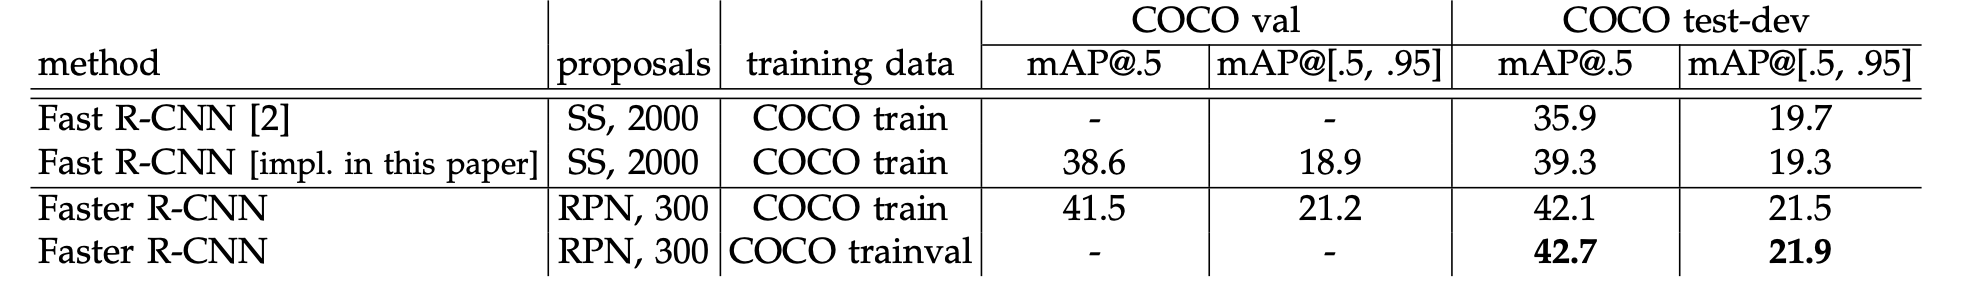

## (8) （アドバンス課題）Faster R-CNNよりも新しい物体検出の論文では、Faster R-CNNがどう引用されているか。

以下がディープラーニングによる一般物体検出手法の発展の時系列をまとめた図である。  
https://github.com/hoya012/deep_learning_object_detection

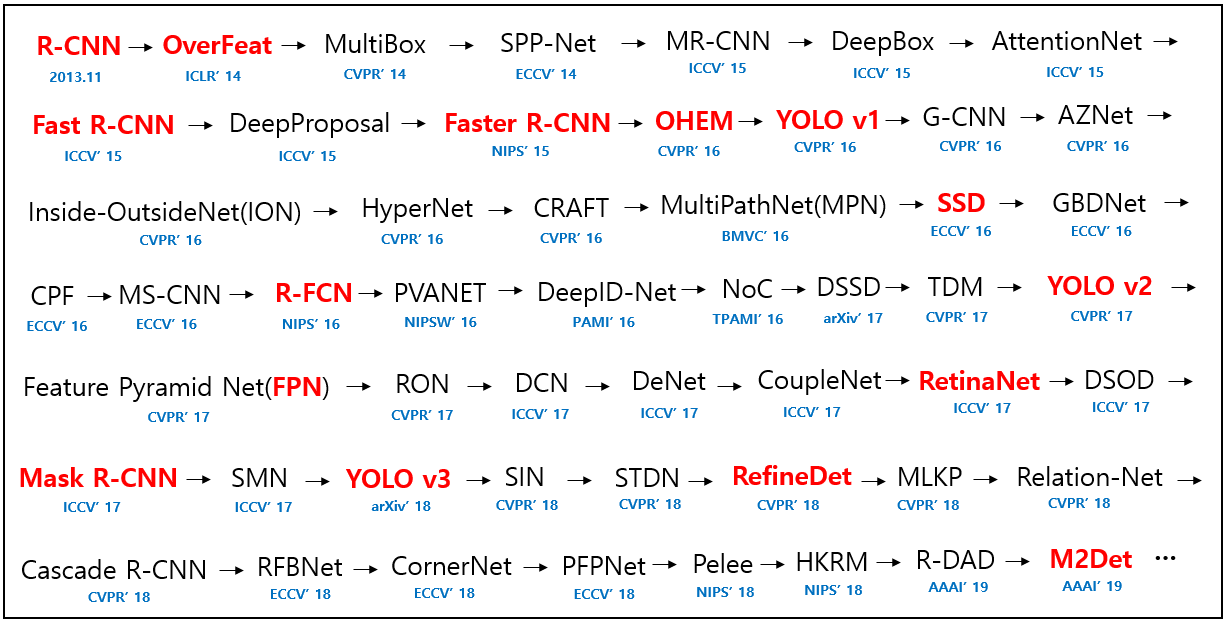

#### 「Mask R-CNN」とは？ （論文：https://arxiv.org/pdf/1703.06870.pdf ）
「Mask R-CNN」は「Faster R-CNN」ベースのアルゴリズムで、「Instance Segmentatino」という物体検出に検出ウィンドウ単位のセグメンテーションが付加されたタスクを解いている手法  
  
Abstract  
We present a conceptually simple, flexible, and general
framework for object instance segmentation. Our approach
efficiently detects objects in an image while simultaneously
generating a high-quality segmentation mask for each instance. The method, called Mask R-CNN, extends Faster
R-CNN by adding a branch for predicting an object mask in
parallel with the existing branch for bounding box recognition. Mask R-CNN is simple to train and adds only a small
overhead to Faster R-CNN, running at 5 fps.  
  
「Mask R-CNN」と名付けたこの手法は「Faster R-CNN」に既存のbounding boxの検出のbranchに加えてobjectのmaskを予測するbranchを追加することで「Faster R-CNN」を拡張したモデルとなっている。「Mask R-CNN」は学習させるのが簡単で、かつ処理速度に置いては推論時に5fpsと「Faster R-CNN」にわずかのoverheadを生じさせるだけとなっている。加えて「Mask R-CNN」はhuman pose推定などの他のタスクに汎用化しやすい。  
  
The method, called Mask R-CNN, extends Faster R-CNN by adding a branch for predicting an object mask in parallel with the existing branch for bounding box recognition. Mask R-CNN is simple to train and adds only a small overhead to Faster R-CNN, running at 5 fps. Moreover, Mask R-CNN is easy to generalize to other tasks, e.g., allowing us to estimate human poses in the same framework.